In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Distribución Beta:

$$ \theta \sim \text{Beta}(\alpha,\beta)  \hspace{1cm} 0\leq\theta\leq1,   \hspace{1cm} \alpha,\beta>0 $$

$$ p(\theta|\alpha,\beta)  = \frac{1}{\text{B}(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \hspace{2cm} \text{donde} \hspace{0.5cm} \text{B}(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)} = \int_0^1x^{\alpha-1}(1-x)^{\beta-1}dx$$

$$\text{E}(\theta) = \frac{\alpha}{\alpha+\beta} $$
$$\text{var}(\theta) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)} $$

$$\text{moda}(\theta) = \frac{\alpha-1}{\alpha+\beta-2}  $$

Para una likelihood binomial:
- Con prior uniforme, la posterior es $\theta|y \sim \text{Beta}(y+1,n-y+1)$
- Con prior $\theta \sim \text{Beta}(\alpha,\beta)$ (que corresponde a $\alpha-1$ éxitos previos y $\beta -1$ fracasos previos), la posterior es $\theta \sim \text{Beta}(\alpha+y,\beta+n-y)$

# Ejercicio 4

## a)

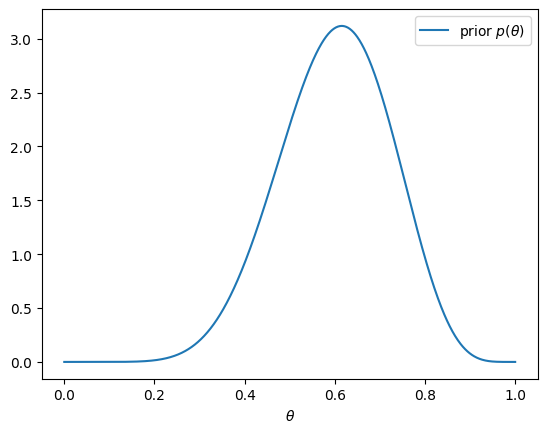

In [4]:
from scipy.stats import beta

a,b = 9,6

x = np.linspace(0,1, 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b), label=r'prior $p(\theta)$')
ax.set_xlabel(r'$\theta$')
plt.legend()

## b)

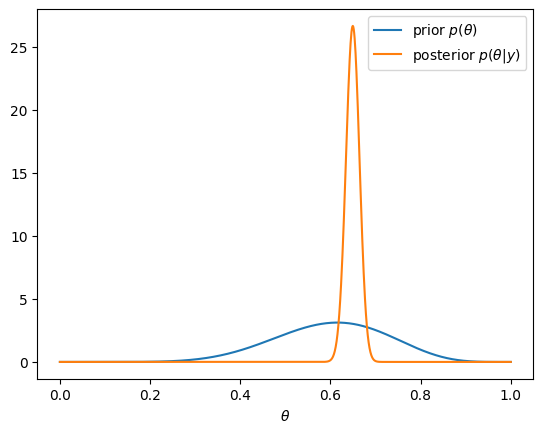

In [5]:
a=9
b=6
y=650
n=1000

x = np.linspace(0,1, 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b), label=r'prior $p(\theta)$')
ax.plot(x, beta.pdf(x, a+y, b+n-y), label=r'posterior $p(\theta|y)$')
ax.set_xlabel(r'$\theta$')
plt.legend()

## c)

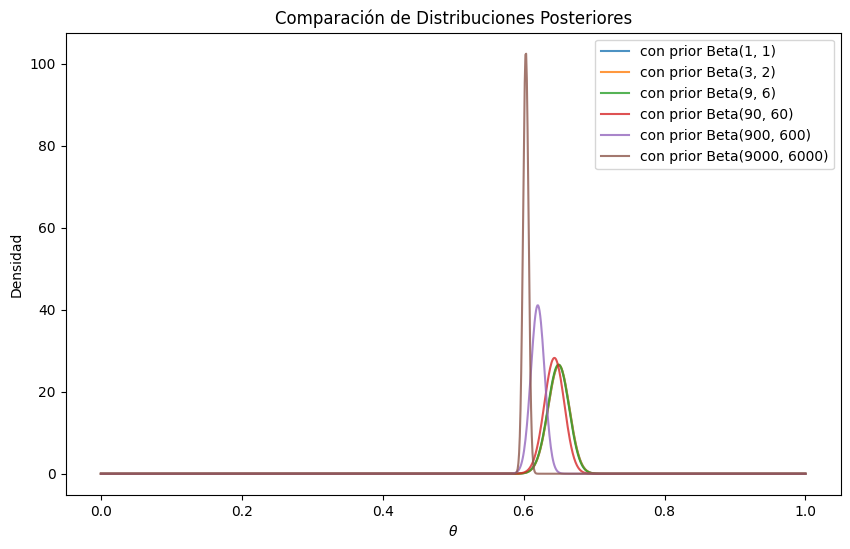

In [6]:
def plot_priors_comparison(priors, y, n):
    x = np.linspace(0, 1, 1000)
    plt.figure(figsize=(10, 6))

    for prior in priors:
        a, b = prior
        posterior = beta(a+y, b+n-y)
        plt.plot(x, posterior.pdf(x), label=f'con prior Beta({a}, {b})',alpha=0.8)

    plt.xlabel(r'$\theta$')
    plt.ylabel('Densidad')
    plt.title('Comparación de Distribuciones Posteriores')
    plt.legend()
    plt.show()

#priors = [(1,1),(9,6)] #no cambia nada porque son ambos muy pequeños y se lleva todo la likelihood por n=1000
priors = [(1,1),(3,2),(9,6),(90,60),(900,600),(9000,6000)] #distintas varianzas, misma media
#priors = [(801,201),(601,401),(501,501),(401,601),(201,801)] #distintas medias, misma varianza

plot_priors_comparison(priors, y, n)